In [6]:
import numpy as np
from scipy.integrate import odeint, quad
from scipy.optimize import brentq
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import seaborn as sbs
import autograd
from autograd.numpy import sqrt,sin
from autograd import grad

rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 20})
rc('text', usetex=True)
rc('animation', html='html5')



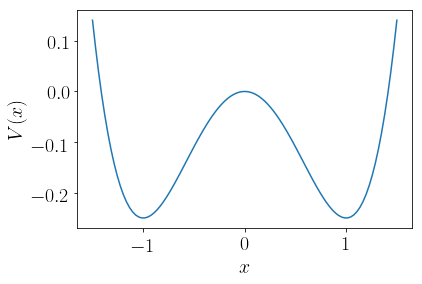

In [185]:
# The potential and its first derivative, as callables.
V = lambda x: 0.5 * x**2 * (0.5 * x**2 - 1)
dVdx = lambda x: x**3 - x

# The potential energy function on a grid of x-points.
xgrid = np.linspace(-1.5, 1.5, 100)
Vgrid = V(xgrid)

plt.plot(xgrid, Vgrid)
plt.xlabel('$x$')
plt.ylabel('$V(x)$')


# def hamiltonian_fn(coords, t):
#     q, p = np.split(coords, 2)
#     c =1
#     m = 1
#     g = 9.81

#     delta = 0
#     gamma = 0.2
#     alpha = -1
#     beta = 1
#     omega = 1.4
#     H = c * sqrt(p ** 2 + m ** 2 * c ** 2) + alpha * (q ** 2) / 2 + beta * (q ** 4) / 4 - q * gamma * sin(
#             omega * t)
#     return H

# def dynamics_fn(t, coords):
#     dcoords = autograd.grad(hamiltonian_fn)(coords, t)
#     dpdt, dqdt = np.split(dcoords, 2)
#     return dqdt,-dpdt


def deriv(X, t, gamma, delta, omega):
    """Return the derivatives dx/dt and d2x/dt2."""
    
    q, p = X
    
    c =1
    m = 3
    g = 9.81

    alpha = -1
    beta = 1
    
    
    xdot = c*p*(p**2+(m**2)*(c**2))**(-.5)
    pdot = -alpha*q-beta*q**3 -delta*xdot +gamma*np.sin(omega*t)
#     print(xdot,pdot)
#     xdotdot = -dVdx(x) -delta * xdot + gamma * np.cos(omega*t)
    return xdot, pdot

def solve_duffing(tmax, dt_per_period, t_trans, x0, v0, gamma, delta, omega):
    """Solve the Duffing equation for parameters gamma, delta, omega.

    Find the numerical solution to the Duffing equation using a suitable
    time grid: tmax is the maximum time (s) to integrate to; t_trans is
    the initial time period of transient behaviour until the solution
    settles down (if it does) to some kind of periodic motion (these data
    points are dropped) and dt_per_period is the number of time samples
    (of duration dt) to include per period of the driving motion (frequency
    omega).

    Returns the time grid, t (after t_trans), position, x, and velocity,
    xdot, dt, and step, the number of array points per period of the driving
    motion.

    """
    # Time point spacings and the time grid

    period = 2*np.pi/omega
    dt = 2*np.pi/omega / dt_per_period
    step = int(period / dt)
    t = np.arange(0, tmax, dt)
    # Initial conditions: x, xdot
    X0 = [x0, v0]
    X = odeint(deriv, X0, t, args=(gamma, delta, omega))
    idx = int(t_trans / dt)
    return t[idx:], X[idx:], dt, step

# Set up the motion for a oscillator with initial position
# x0 and initially at rest.
x0, v0 = 0,0
tmax, t_trans = 20000, 0
omega = 1
gamma, delta =10, 0.0
dt_per_period = 100

# Solve the equation of motion.
t, X, dt, pstep = solve_duffing(tmax, dt_per_period, t_trans, x0, v0, gamma, delta, omega)
x, xdot = X.T

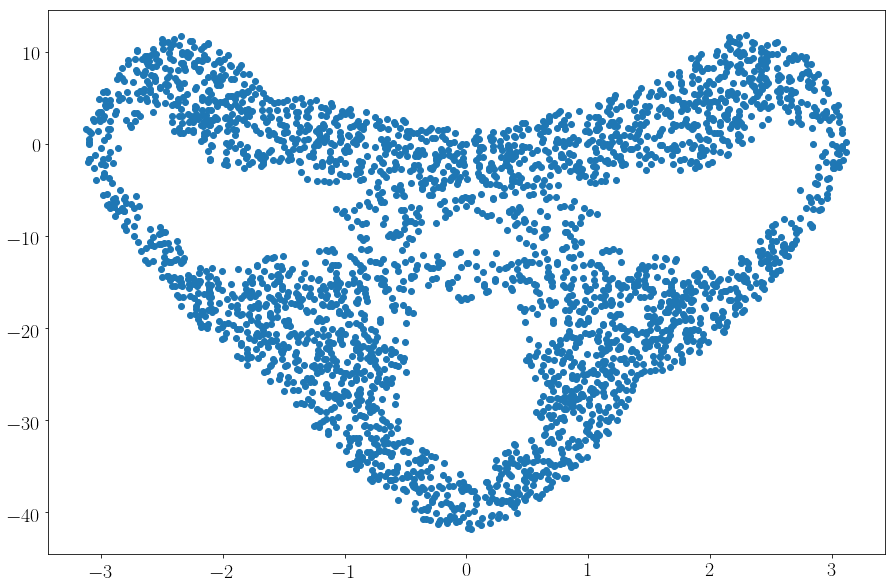

In [186]:
plt.figure(figsize=(15,10))
plt.scatter(x[::100],xdot[::100])

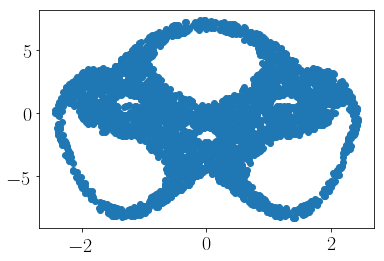

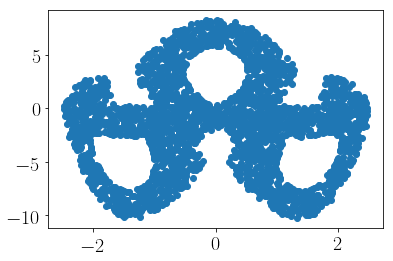

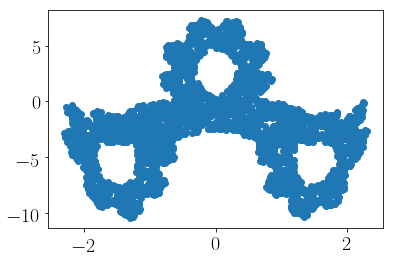

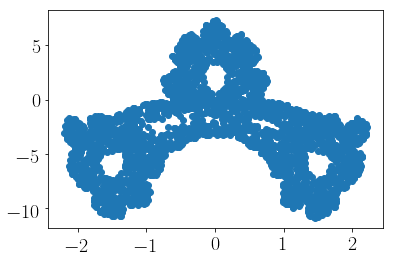

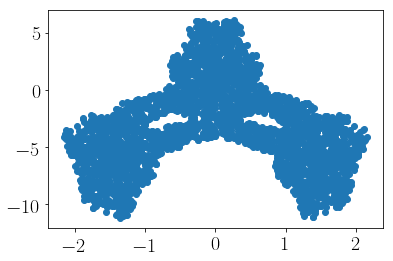

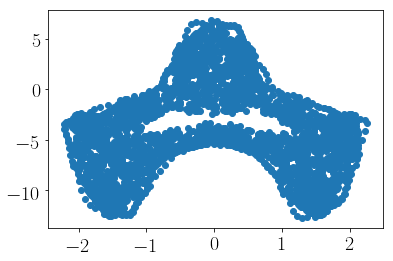

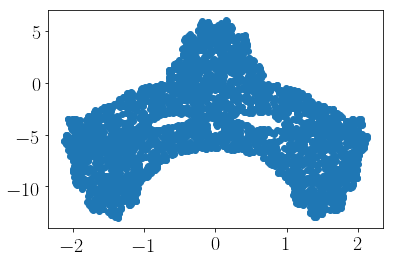

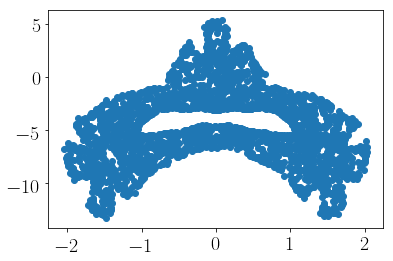

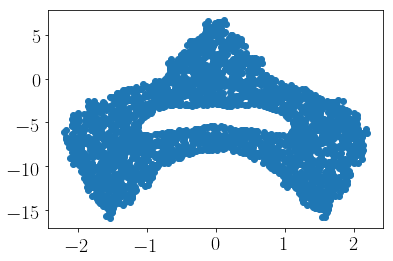

In [143]:
# x0, v0 = 0,0
# tmax, t_trans = 10000, 0

# for i in range(1,10):
#     for j in range(3,4):
#         omega = [0.5,1,1.5,2,2.5][j]
#         gamma, delta = i, 0.
#         dt_per_period = 100

#         # Solve the equation of motion.
#         t, X, dt, pstep = solve_duffing(tmax, dt_per_period, t_trans, x0, v0, gamma, delta, omega)
#         x, xdot = X.T
#         plt.figure()
#         plt.scatter(x[::100],xdot[::100])

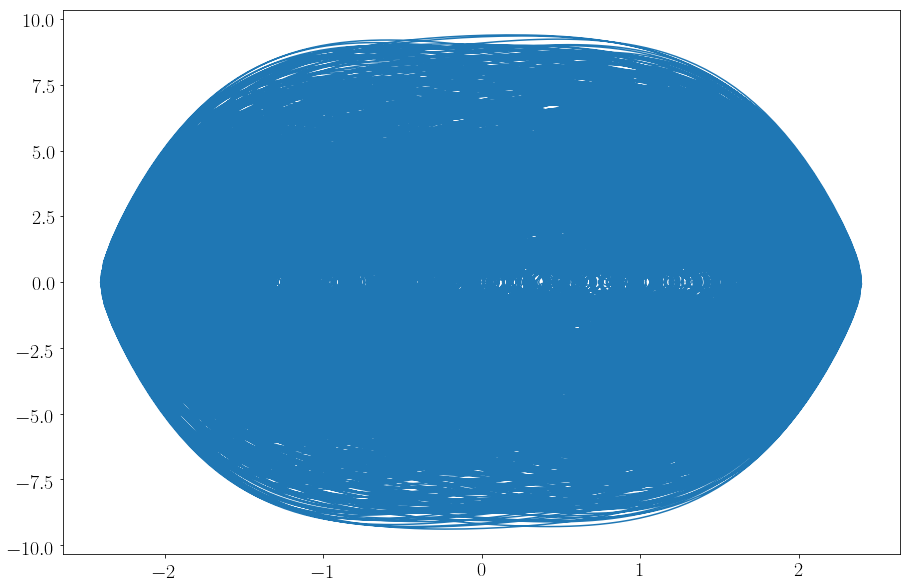

In [128]:
plt.figure(figsize=(15,10))
plt.plot(x[400::1],xdot[400::1])